In [ ]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Movie_regression.csv", header=0)

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [ ]:
df.isnull().sum()

,0
Marketing expense,0
Production expense,0
Multiplex coverage,0
Budget,0
Movie_length,0
Lead_ Actor_Rating,0
Lead_Actress_rating,0
Director_rating,0
Producer_rating,0
Critic_rating,0


In [ ]:
df["Time_taken"].mean()

157.3914979757085

In [ ]:
df["Time_taken"].fillna(value=df["Time_taken"].mean() , inplace=True)

<ipython-input-11-45031f7c5a96>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Time_taken"].fillna(value=df["Time_taken"].mean() , inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [ ]:
df.isnull().sum()

,0
Marketing expense,0
Production expense,0
Multiplex coverage,0
Budget,0
Movie_length,0
Lead_ Actor_Rating,0
Lead_Actress_rating,0
Director_rating,0
Producer_rating,0
Critic_rating,0


### Dummy variable Creation

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [ ]:
df = pd.get_dummies(df, columns=["3D_available", "Genre"], drop_first=True)

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,False,True,False


### Dependent and Independent Data split :

In [ ]:
x = df.loc[:, df.columns!="Collection"]

In [ ]:
x.shape

(506, 19)

In [ ]:
y = df["Collection"]

In [ ]:
y.shape

(506,)

### Train-Test Split :

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state=0)

In [ ]:
x_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,False,False,False,True
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,False,False,False,False
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,True,True,False,False
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,True,False,False,True
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,True,False,False,False


In [ ]:
x_train.shape

(404, 19)

In [ ]:
x_test.shape

(102, 19)

### Training Regression Tree

In [ ]:
from sklearn import tree
regTree = tree.DecisionTreeRegressor(max_depth=3)  # no. of layers are 3

In [ ]:
regTree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

### Predicting Value :

In [ ]:
y_train_pred = regTree.predict(x_train)
y_test_pred = regTree.predict(x_test)

In [ ]:
y_test_pred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184, 100000.        ,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

### Model Performance :

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test, y_test_pred)

99983788.27972667

In [ ]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [ ]:
r2_score(y_test, y_test_pred)

0.6894186462226066

### Plotting Decision Tree :

In [ ]:
dot_data = tree.export_graphviz(regTree, out_file=None)

In [ ]:
from IPython.display import Image

In [ ]:
import pydotplus

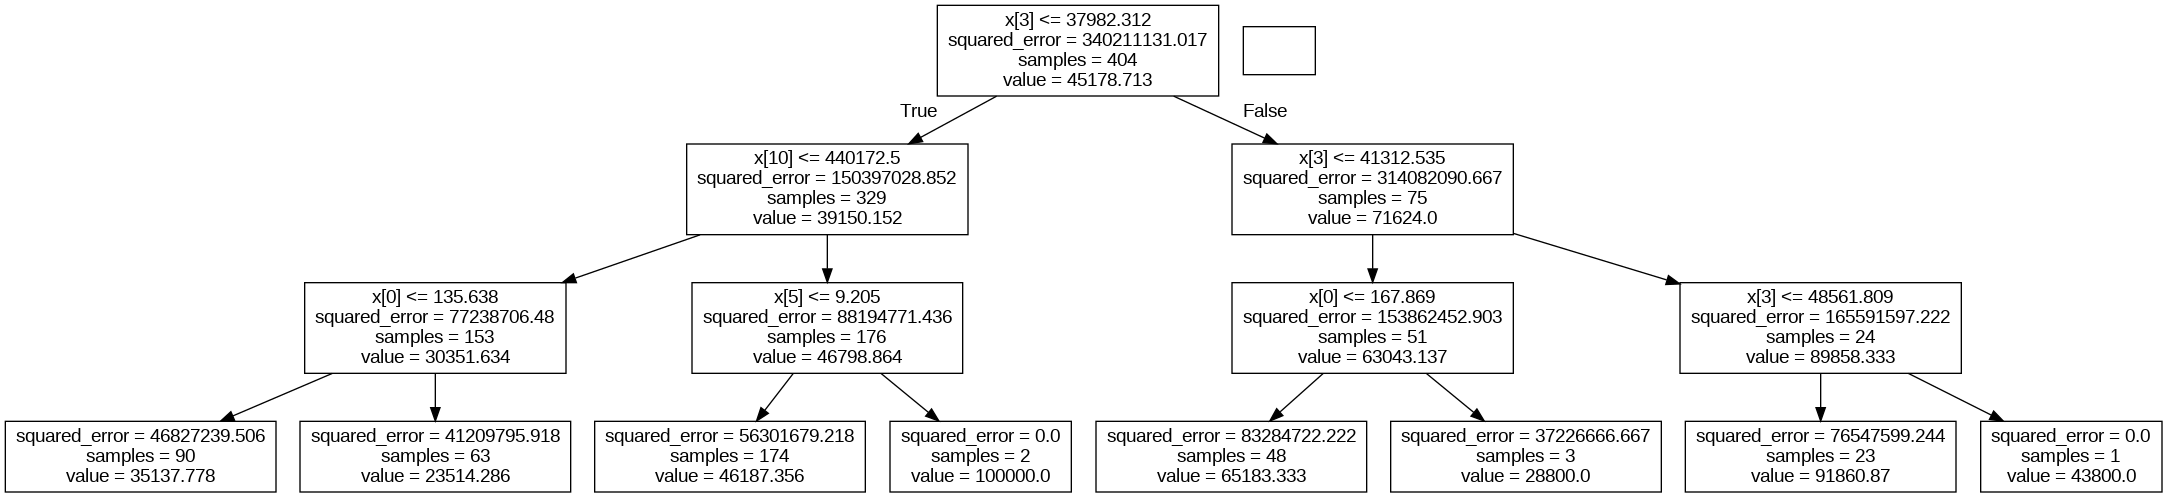

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree Growth :
only pre pruning, not post pruning because python do not support post pruning

### 1 : Max No. of level in tree:

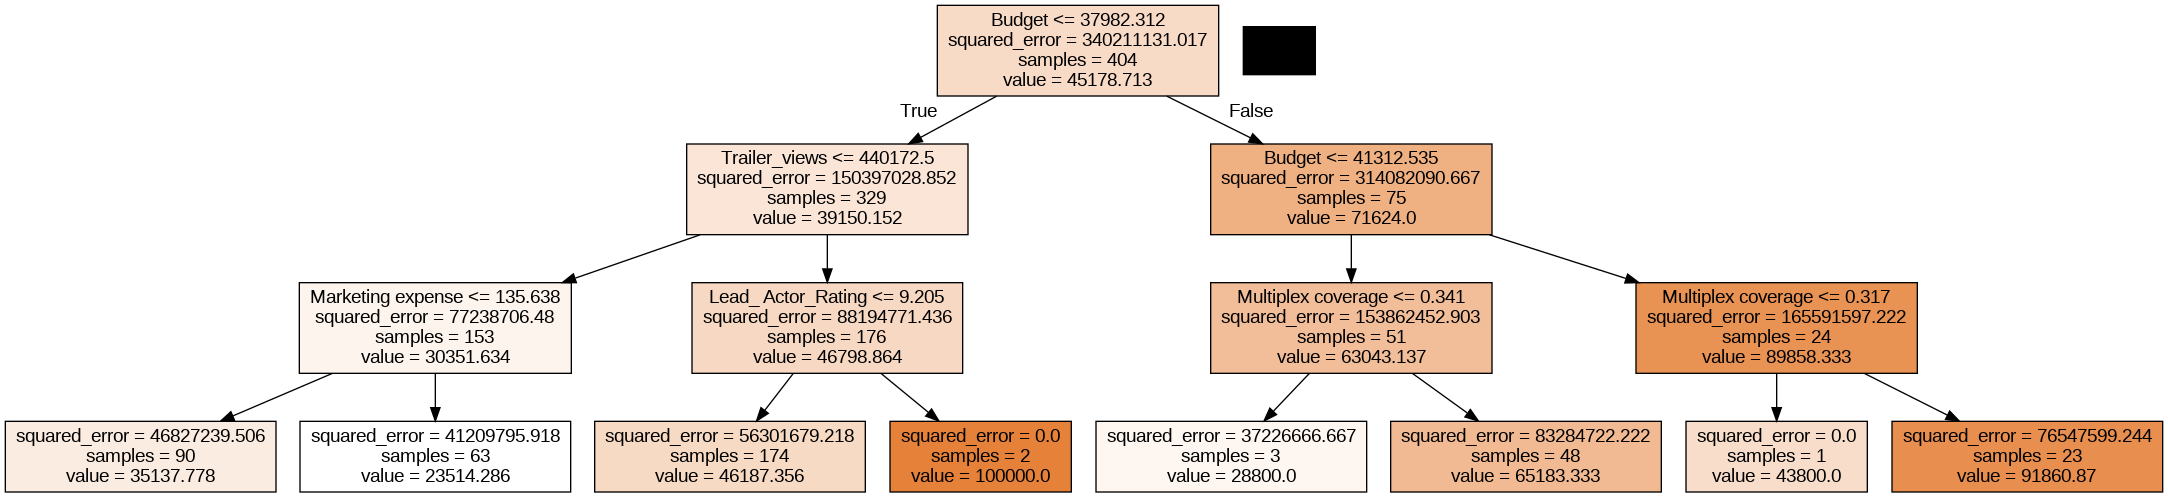

In [ ]:
regTree1 = tree.DecisionTreeRegressor(max_depth=3)
regTree1.fit(x_train, y_train)
dot_data = tree.export_graphviz(regTree1, out_file=None, feature_names = x_train.columns , filled = True ) # feature_names is used if not then we get blocks like x[1], x[2] and so on.
# and "filled" is used to fill the color according to that value
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

### 2 : Minimum observation at internal node :

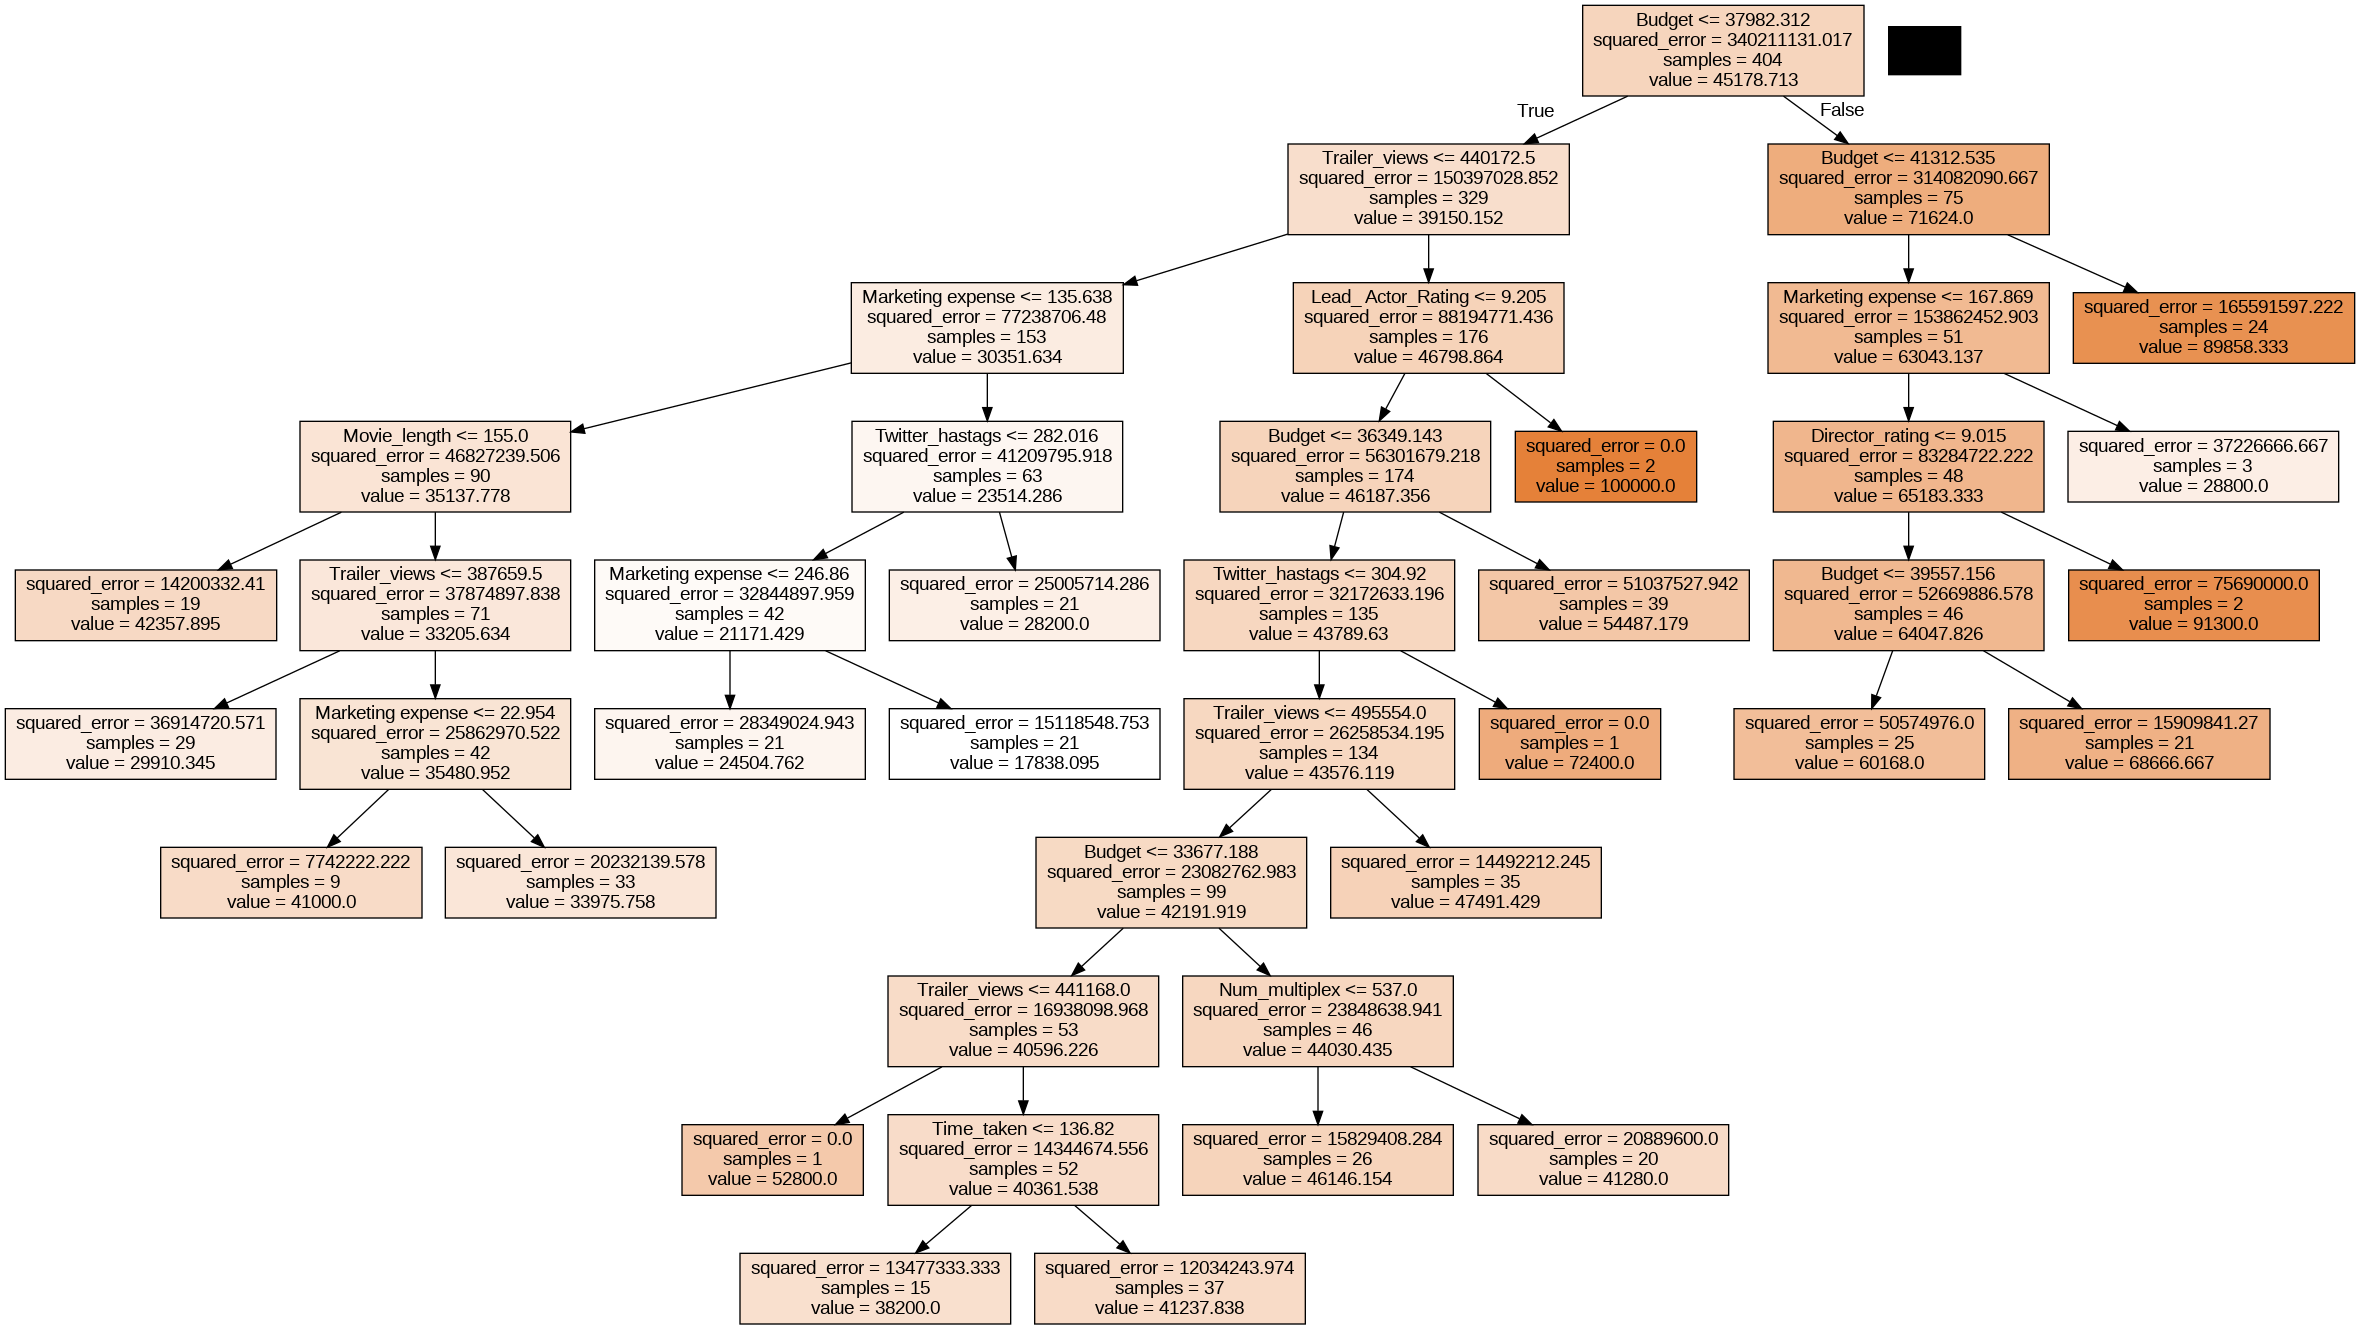

In [ ]:
regTree2 = tree.DecisionTreeRegressor(min_samples_split=40)
regTree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(regTree2, out_file= None, feature_names = x_train.columns , filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

### 3 : Minimum no. of samples in the leaf node :

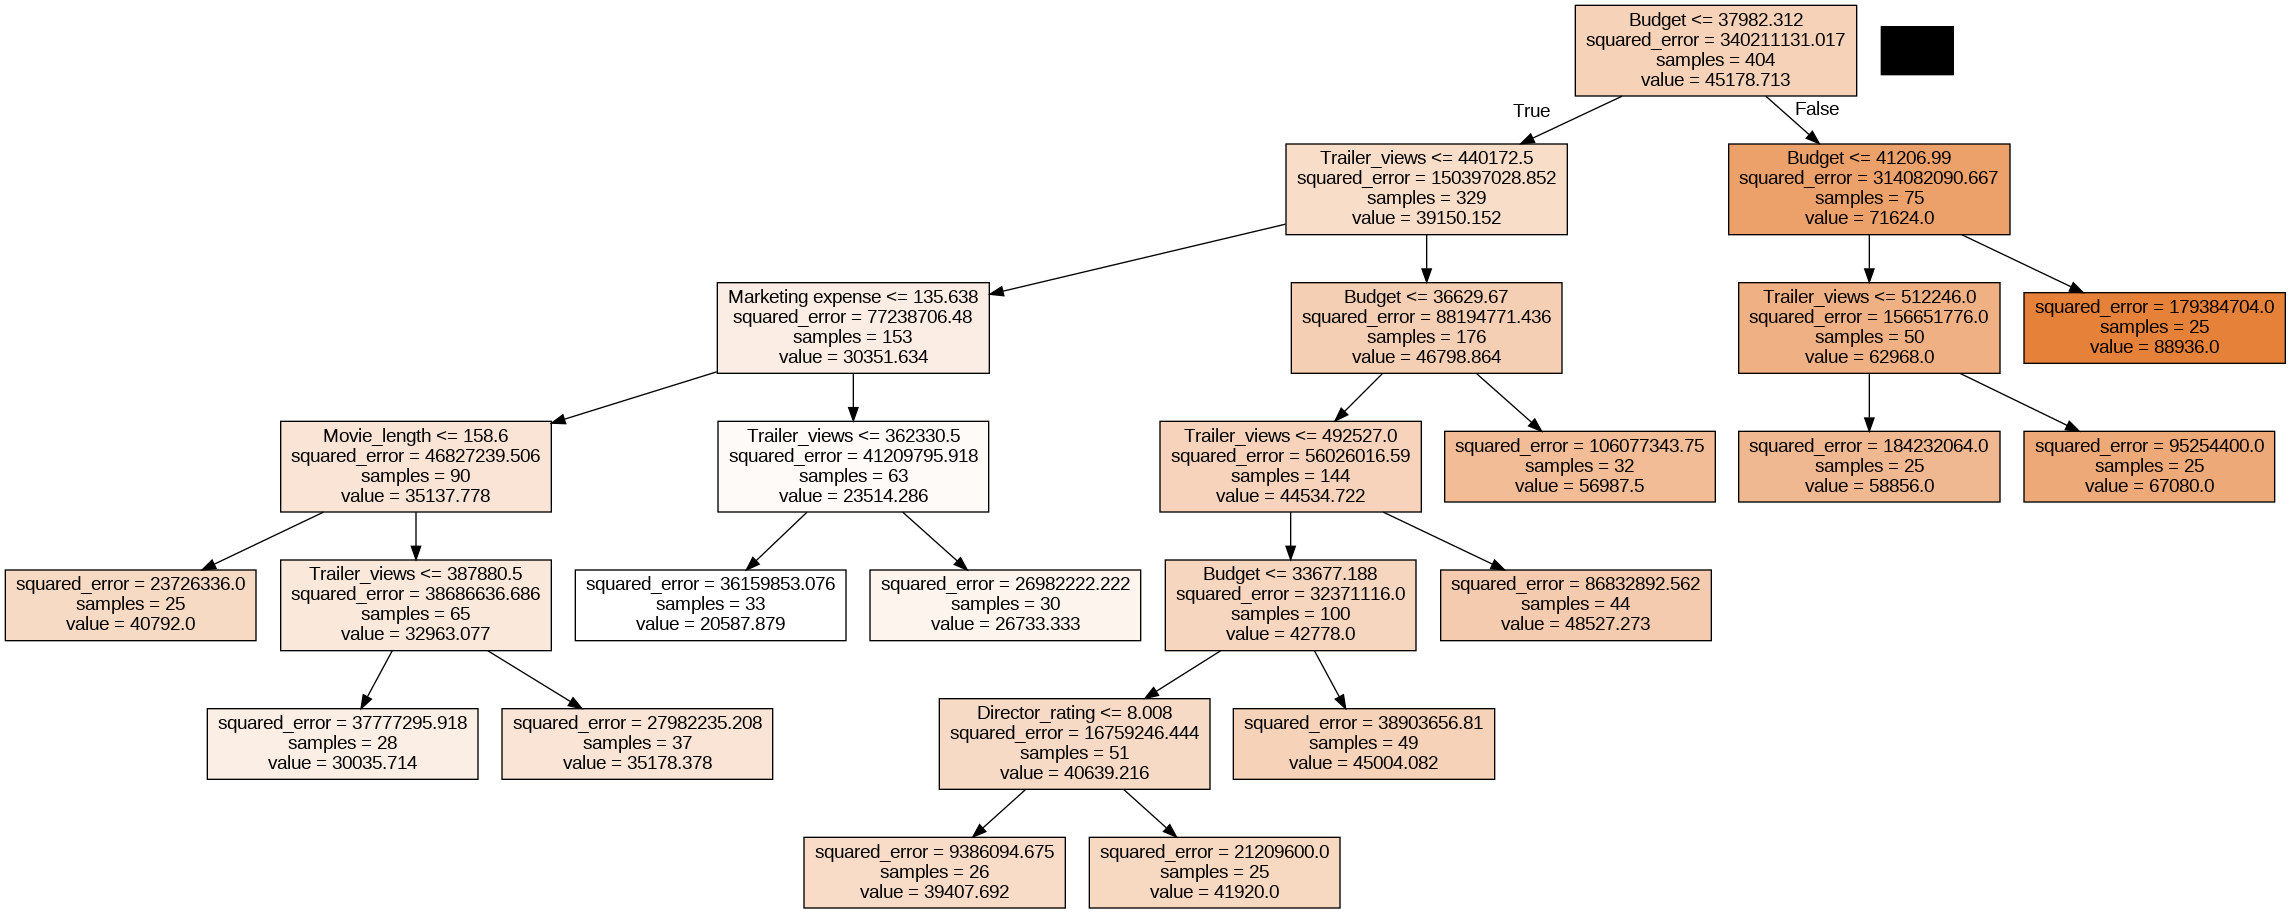

In [ ]:
regTree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25)
regTree3.fit(x_train, y_train)
dot_data = tree.export_graphviz(regTree3, out_file= None, feature_names = x_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

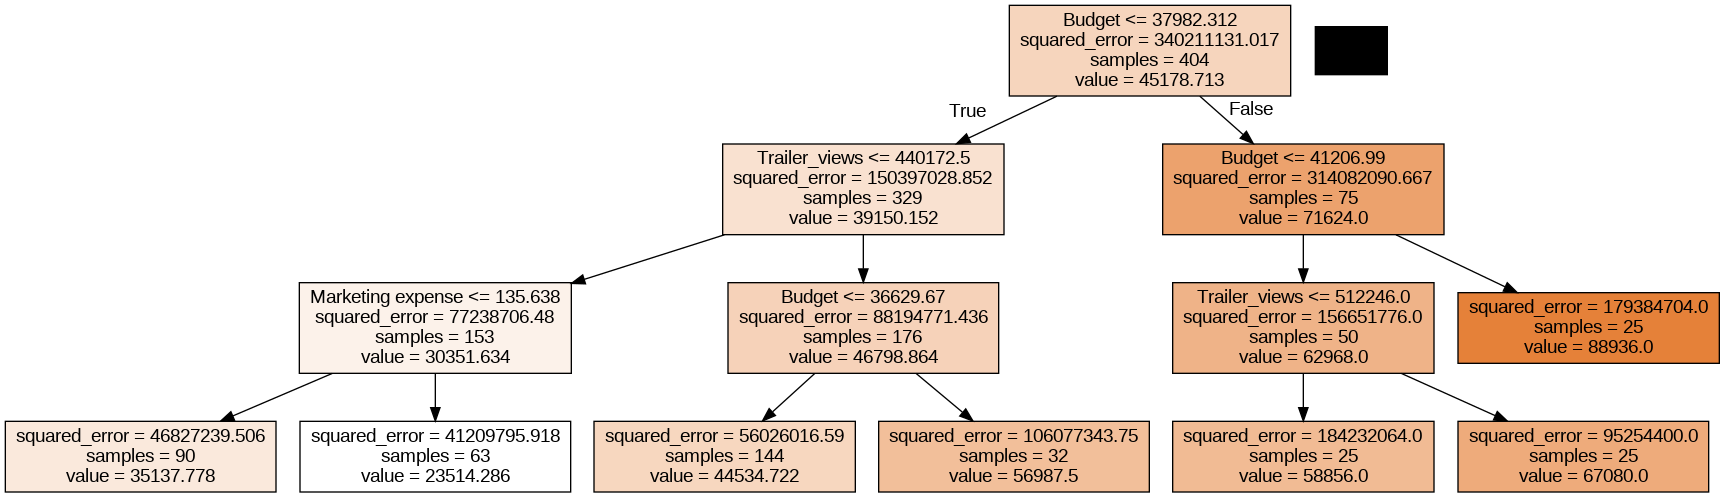

In [ ]:
# in this we can also add max_depth :
regTree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth=3)
regTree3.fit(x_train, y_train)
dot_data = tree.export_graphviz(regTree3, out_file= None, feature_names = x_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

# Combining all three conditions  :

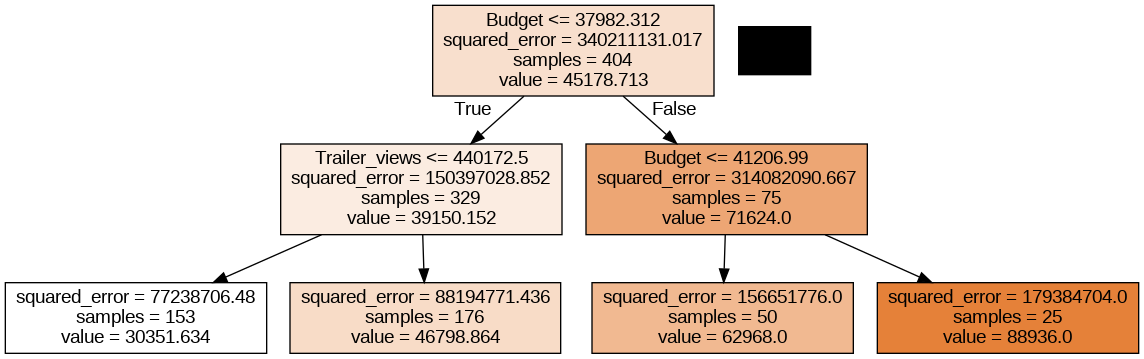

In [ ]:
regTree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, min_samples_split=2, max_depth=2)
regTree3.fit(x_train, y_train)
dot_data = tree.export_graphviz(regTree3, out_file= None, feature_names = x_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())